https://totoma3.tistory.com/201

https://github.com/ralaruri/p_median_python

https://dacon.io/codeshare/1358

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155629 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
mpl.rc('font', family=font_name)
mpl.font_manager._rebuild()

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/Shareddrives/데마 팀플 2/텀프로젝트/통합 Data/복지data3.xlsx')   #데이터셋 불러오기

In [ ]:
df.shape

(31, 4)

In [ ]:
df.head()

,시군구,총 급식소,복지 공무원 수 (경기도 시군 조직 정보),노인 수(2021.05)
0,가평군,24.0,98.0,16626.0
1,고양시,57.0,525.0,149289.0
2,과천시,8.0,66.0,9694.0
3,광명시,16.0,162.0,42123.0
4,광주시,15.0,197.0,52902.0


In [ ]:
a = df['시군구'].values.tolist()

In [ ]:
df=df.drop(['시군구'],axis=1)

In [ ]:
df

,총 급식소,복지 공무원 수 (경기도 시군 조직 정보),노인 수(2021.05)
0,24.0,98.0,16626.0
1,57.0,525.0,149289.0
2,8.0,66.0,9694.0
3,16.0,162.0,42123.0
4,15.0,197.0,52902.0
5,23.0,119.0,27339.0
6,27.0,152.0,37160.0
7,22.0,197.0,60157.0
8,84.0,342.0,103718.0
9,25.0,109.0,19381.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(df)

In [ ]:
scaled = pd.DataFrame(scaled, columns = df.columns)
scaled.describe() # 기초통계량

,총 급식소,복지 공무원 수 (경기도 시군 조직 정보),노인 수(2021.05)
count,3.100000e+01,3.100000e+01,3.100000e+01
mean,-1.862310e-16,8.595275e-17,-1.432546e-17
std,1.016530e+00,1.016530e+00,1.016530e+00
min,-1.330963e+00,-1.135962e+00,-1.205545e+00
25%,-6.195861e-01,-7.989778e-01,-7.386196e-01
50%,-3.497536e-01,-5.142845e-01,-4.070886e-01
75%,4.352138e-01,6.244884e-01,4.155712e-01
max,2.397632e+00,2.309407e+00,2.231519e+00


In [ ]:
data_prime = scaled.copy()

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
clusters = linkage(y=data_prime, method='complete', metric='euclidean')

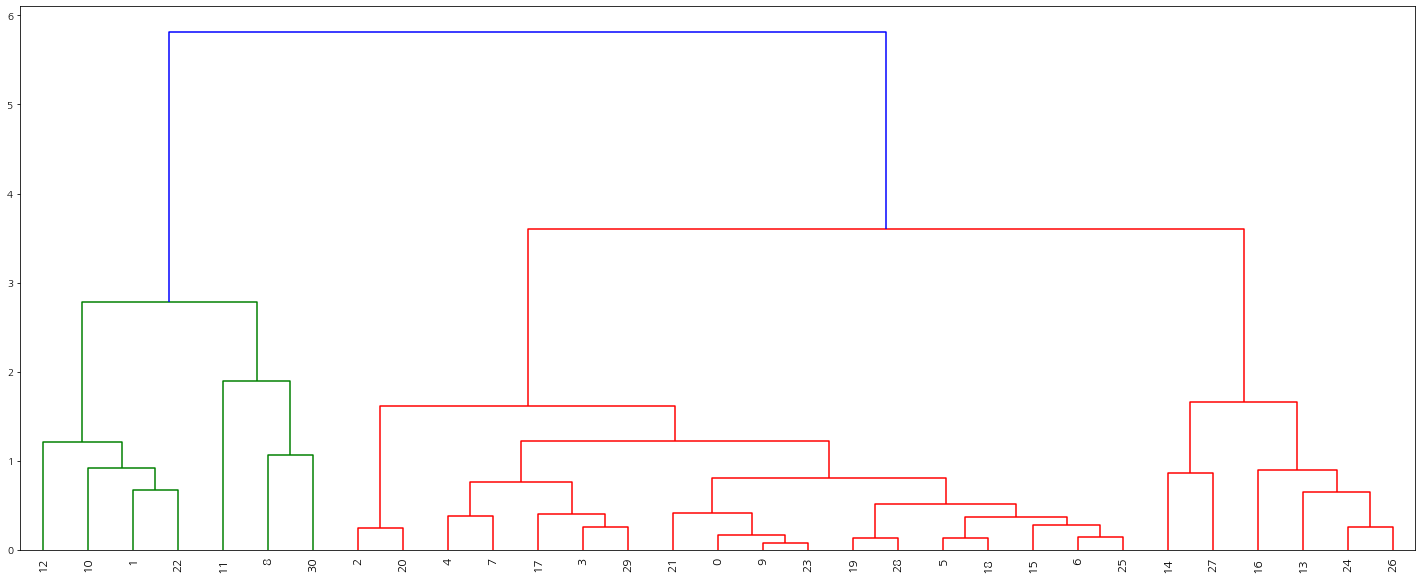

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
plt.show()

In [ ]:
cut_tree = fcluster(clusters, t=5, criterion='distance')
cut_tree

array([2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1], dtype=int32)

In [ ]:
pd.Series(cut_tree).value_counts()

2    24
1     7
dtype: int64

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(data_prime, cut_tree)
print('Silhouette Score:', score_samples[:5], '\nSilhouette Score shape:', score_samples.shape, '\n')

average_score = silhouette_score(data_prime, cut_tree)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:{0:.3f}'.format(average_score))

Silhouette Score: [0.76546132 0.62892142 0.69408202 0.75657848 0.70714803] 
Silhouette Score shape: (31,) 

Silhouette Average Score:0.609


In [ ]:
data_prime['hc_cluster'] = cut_tree
data_prime['silhouette_coeff'] = score_samples
data_prime

,총 급식소,복지 공무원 수 (경기도 시군 조직 정보),노인 수(2021.05),hc_cluster,silhouette_coeff
0,-0.545995,-0.926799,-1.034868,2,0.765461
1,1.073000,1.554099,2.231519,1,0.628921
2,-1.330963,-1.112721,-1.205545,2,0.694082
3,-0.938479,-0.554955,-0.407089,2,0.756578
4,-0.987540,-0.351603,-0.141691,2,0.707148
5,-0.595056,-0.804788,-0.771096,2,0.790307
6,-0.398814,-0.613056,-0.529286,2,0.779622
7,-0.644116,-0.351603,0.036939,2,0.690598
8,2.397632,0.490857,1.109484,1,0.419288
9,-0.496935,-0.862888,-0.967035,2,0.774899


In [ ]:
# 군집별 평균 silhouette_score 값
print(data_prime.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', data_prime.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1    0.527708
2    0.633063
Name: silhouette_coeff, dtype: float64
표준편차: 0.07449772468420424


In [ ]:
cluster_g = data_prime.groupby('hc_cluster')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
mpl.rc('font', family=font_name)
mpl.font_manager._rebuild()

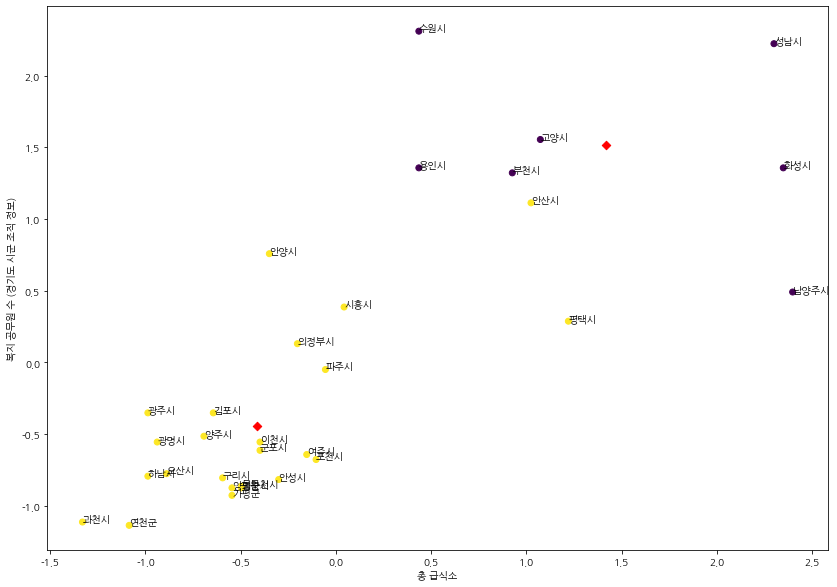

In [ ]:
import seaborn as ans
import matplotlib.pyplot as plt
import numpy as np

x = data_prime['총 급식소']
y = data_prime['복지 공무원 수 (경기도 시군 조직 정보)']
n = a
plt.rcParams["figure.figsize"] = (14,10)
fig, ax = plt.subplots()
ax.scatter(x, y, c=data_prime['hc_cluster'])
hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
ax.scatter(x=hc_centers[:,0], y=hc_centers[:,1], marker='D', c='r') # 각 cluster별 centroid 시각화
plt.xlabel('총 급식소')
plt.ylabel('복지 공무원 수 (경기도 시군 조직 정보)')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

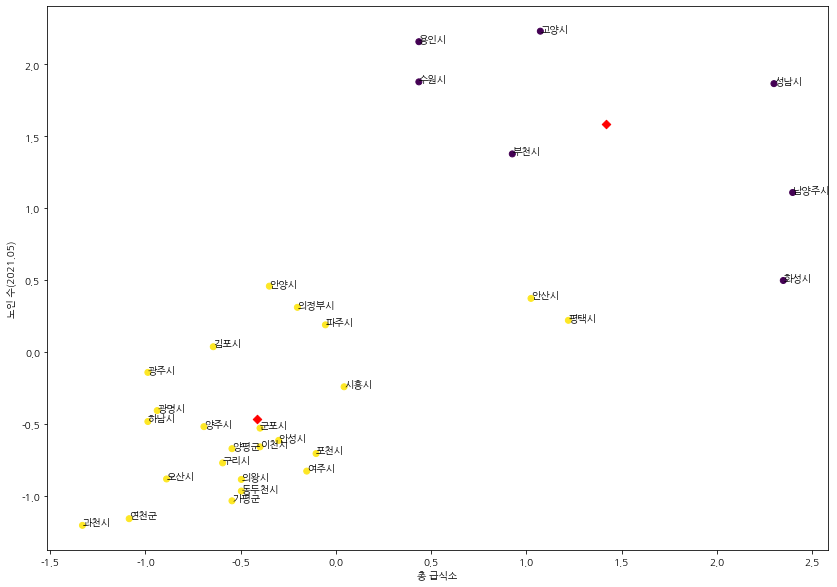

In [ ]:
import seaborn as ans
import matplotlib.pyplot as plt
import numpy as np

x = data_prime['총 급식소']
y = data_prime['노인 수(2021.05)']
n = a
plt.rcParams["figure.figsize"] = (14,10)
fig, ax = plt.subplots()
ax.scatter(x, y, c=data_prime['hc_cluster'])
hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
ax.scatter(x=hc_centers[:,0], y=hc_centers[:,2], marker='D', c='r') # 각 cluster별 centroid 시각화
plt.xlabel('총 급식소')
plt.ylabel('노인 수(2021.05)')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

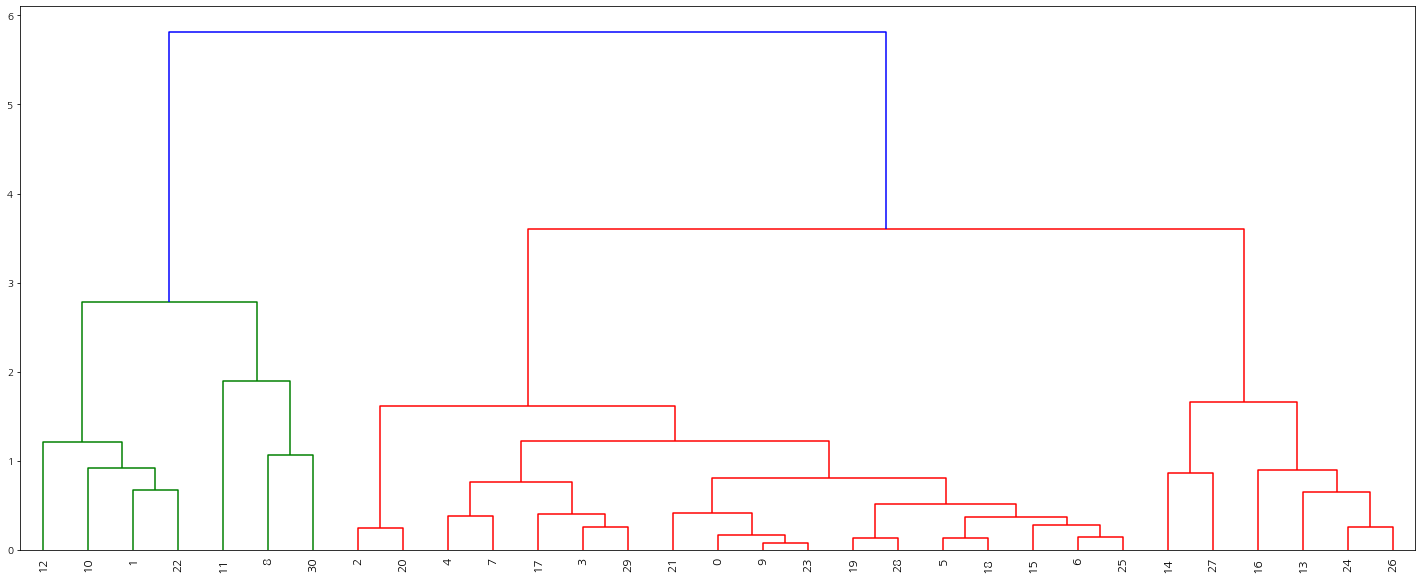

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
plt.show()

In [ ]:
cut_tree = fcluster(clusters, t=2, criterion='distance')
cut_tree

array([3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 1, 2, 1, 4, 4, 3, 4, 3, 3, 3, 3, 3,
       1, 3, 4, 3, 4, 4, 3, 3, 2], dtype=int32)

In [ ]:
pd.Series(cut_tree).value_counts()

3    18
4     6
1     4
2     3
dtype: int64

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(data_prime, cut_tree)
print('Silhouette Score:', score_samples[:5], '\nSilhouette Score shape:', score_samples.shape, '\n')

average_score = silhouette_score(data_prime, cut_tree)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:{0:.3f}'.format(average_score))

Silhouette Score: [0.82439308 0.67585052 0.72321613 0.79470201 0.71231093] 
Silhouette Score shape: (31,) 

Silhouette Average Score:0.644


In [ ]:
data_prime['hc_cluster'] = cut_tree
data_prime['silhouette_coeff'] = score_samples
data_prime

,총 급식소,복지 공무원 수 (경기도 시군 조직 정보),노인 수(2021.05),k_means_cluster,k_silhouette_coeff,hc_cluster,silhouette_coeff
0,-0.545995,-0.926799,-1.034868,0,0.778924,3,0.824393
1,1.073000,1.554099,2.231519,3,0.634293,1,0.675851
2,-1.330963,-1.112721,-1.205545,0,0.658225,3,0.723216
3,-0.938479,-0.554955,-0.407089,0,0.730425,3,0.794702
4,-0.987540,-0.351603,-0.141691,0,0.618092,3,0.712311
5,-0.595056,-0.804788,-0.771096,0,0.813996,3,0.854395
6,-0.398814,-0.613056,-0.529286,0,0.768846,3,0.823111
7,-0.644116,-0.351603,0.036939,0,0.569778,3,0.677823
8,2.397632,0.490857,1.109484,1,0.497419,2,0.508066
9,-0.496935,-0.862888,-0.967035,0,0.792042,3,0.835632


In [ ]:
# 군집별 평균 silhouette_score 값
print(data_prime.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', data_prime.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1    0.605839
2    0.467822
3    0.798608
4    0.291523
Name: silhouette_coeff, dtype: float64
표준편차: 0.2146001877535706


In [ ]:
cluster_g = data_prime.groupby('hc_cluster')

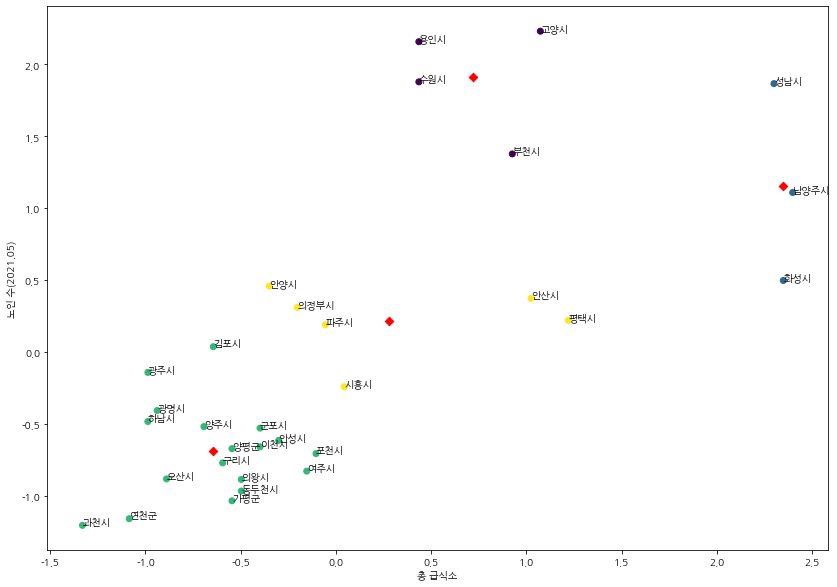

In [ ]:
import seaborn as ans
import matplotlib.pyplot as plt
import numpy as np

x = data_prime['총 급식소']
y = data_prime['노인 수(2021.05)']
n = a
plt.rcParams["figure.figsize"] = (14,10)
fig, ax = plt.subplots()
ax.scatter(x, y, c=data_prime['hc_cluster'])
hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
ax.scatter(x=hc_centers[:,0], y=hc_centers[:,2], marker='D', c='r') # 각 cluster별 centroid 시각화
plt.xlabel('총 급식소')
plt.ylabel('노인 수(2021.05)')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

# K Means 클러스터링

In [ ]:
data_prime = scaled.copy()

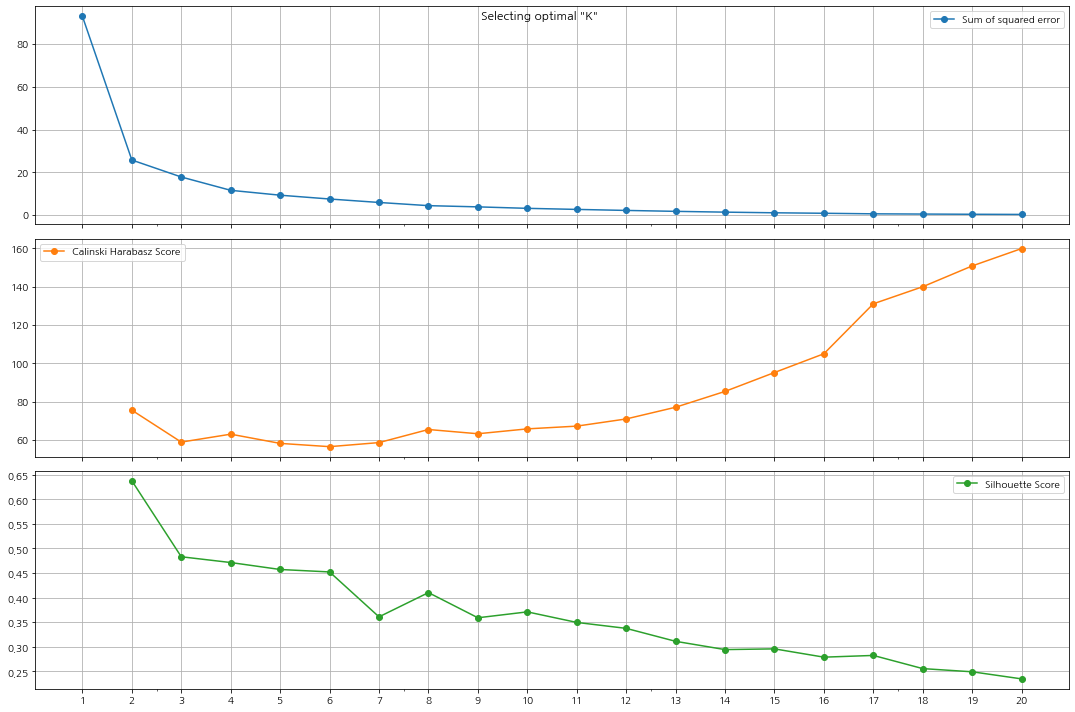

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(data_prime)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(data_prime)
        chs = calinski_harabasz_score(data_prime, cluster)
        ss = silhouette_score(data_prime, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

In [ ]:
from sklearn.cluster import KMeans
'''
init: {'k-means++', 'random'}, default='k-means++'
algorithm: {'auto', 'full', 'elkan'}, default='auto'
'''

model = KMeans(n_clusters=2, random_state=312, algorithm='auto')
model.fit(data_prime)

KMeans(n_clusters=2, random_state=312)

In [ ]:
# 각 군집(cluster) 표시
pred = model.predict(data_prime)
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [ ]:
# 군집별 centroids의 좌표값
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns = data_prime.columns)

In [ ]:
centroids

,총 급식소,복지 공무원 수 (경기도 시군 조직 정보),노인 수(2021.05)
0,-0.552686,-0.545976,-0.532457
1,1.351009,1.334608,1.301561


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
data_prime['k_means_cluster'] = pred
data_prime['k_silhouette_coeff'] = silhouette_samples(data_prime, data_prime['k_means_cluster'])

k_average_score = silhouette_score(data_prime, data_prime['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.655


In [ ]:
# 군집별 평균 silhouette_score 값
data_prime.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.724722
1    0.491816
Name: k_silhouette_coeff, dtype: float64

In [ ]:
centroids

,총 급식소,복지 공무원 수 (경기도 시군 조직 정보),노인 수(2021.05)
0,-0.552686,-0.545976,-0.532457
1,1.351009,1.334608,1.301561


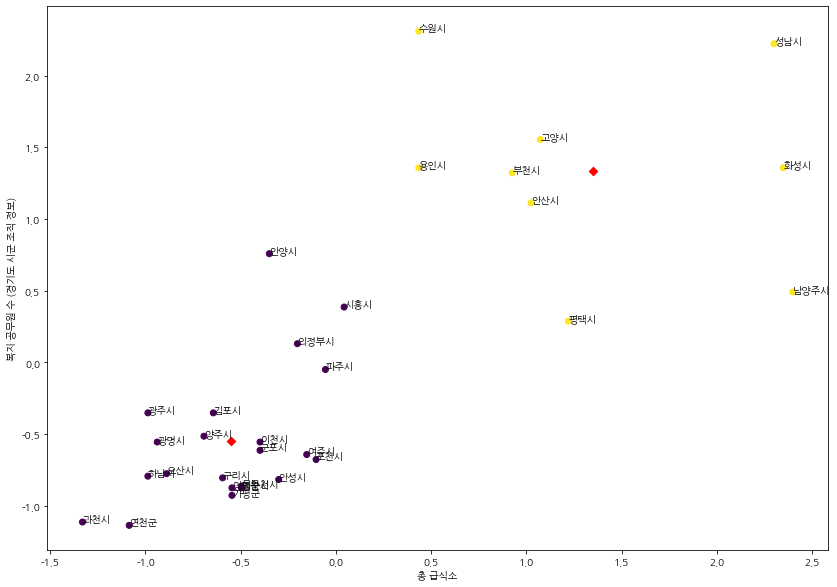

In [ ]:
import seaborn as ans
import matplotlib.pyplot as plt
x = data_prime['총 급식소']
y = data_prime['복지 공무원 수 (경기도 시군 조직 정보)']
n = a

plt.rcParams["figure.figsize"] = (14,10)
fig, ax = plt.subplots()
ax.scatter(x, y, c=data_prime['k_means_cluster'])
ax.scatter(x=centroids.iloc[:,0], y=centroids.iloc[:,1], marker='D', c='r') # x, y는 각각 factor 1번째(0)와 4번째(3)
plt.xlabel('총 급식소')
plt.ylabel('복지 공무원 수 (경기도 시군 조직 정보)')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

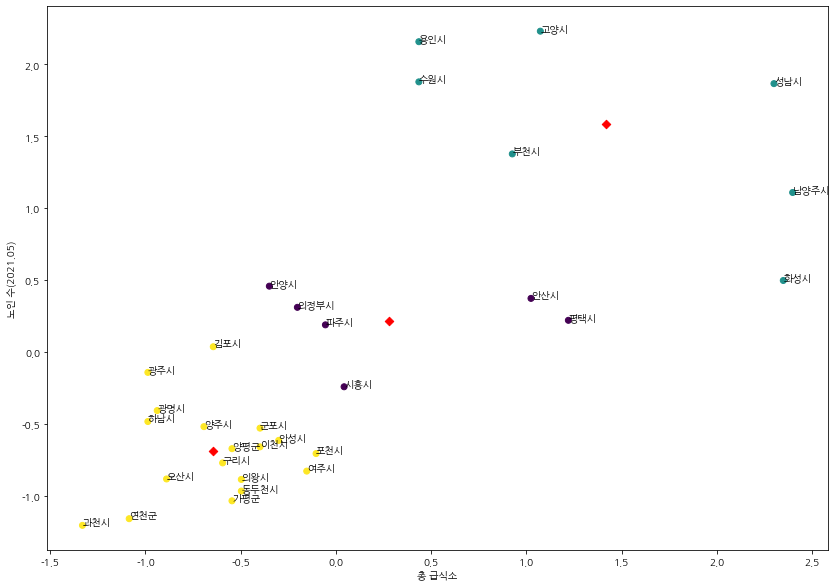

In [ ]:
import seaborn as ans
import matplotlib.pyplot as plt
x = data_prime['총 급식소']
y = data_prime['노인 수(2021.05)']
n = a

plt.rcParams["figure.figsize"] = (14,10)
fig, ax = plt.subplots()
ax.scatter(x, y, c=data_prime['k_means_cluster'])
ax.scatter(x=centroids.iloc[:,0], y=centroids.iloc[:,2], marker='D', c='r') # x, y는 각각 factor 1번째(0)와 4번째(3)
plt.xlabel('총 급식소')
plt.ylabel('노인 수(2021.05)')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

In [ ]:
from sklearn.cluster import KMeans
'''
init: {'k-means++', 'random'}, default='k-means++'
algorithm: {'auto', 'full', 'elkan'}, default='auto'
'''

model = KMeans(n_clusters=5, random_state=312, algorithm='auto')
model.fit(data_prime)

KMeans(n_clusters=5, random_state=312)

In [ ]:
# 각 군집(cluster) 표시
pred = model.predict(data_prime)
pred

array([0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 3, 2, 4, 0, 2, 0, 0, 0, 0, 0,
       3, 0, 2, 0, 2, 4, 0, 0, 1], dtype=int32)

In [ ]:
# 군집별 centroids의 좌표값
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns = data_prime.columns)

In [ ]:
centroids

,총 급식소,복지 공무원 수 (경기도 시군 조직 정보),노인 수(2021.05),k_means_cluster,k_silhouette_coeff
0,-0.644116,-0.735390,-0.690576,0.0,0.805262
1,2.348572,1.356557,1.157907,1.0,0.322027
2,-0.141247,0.306387,0.179080,3.0,0.711996
3,0.717311,1.635440,1.911683,2.0,0.407857
4,1.122060,0.700019,0.296796,2.0,0.009437


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
data_prime['k_means_cluster'] = pred
data_prime['k_silhouette_coeff'] = silhouette_samples(data_prime, data_prime['k_means_cluster'])

k_average_score = silhouette_score(data_prime, data_prime['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.677


In [ ]:
# 군집별 평균 silhouette_score 값
data_prime.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.740710
1    0.461460
2    0.721821
3    0.565637
4    0.598967
Name: k_silhouette_coeff, dtype: float64

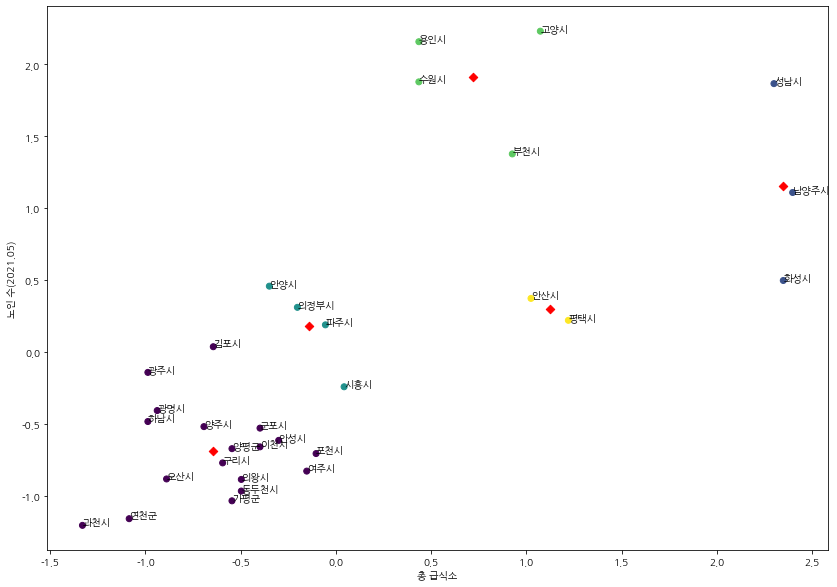

In [ ]:
import seaborn as ans
import matplotlib.pyplot as plt
x = data_prime['총 급식소']
y = data_prime['노인 수(2021.05)']
n = a

plt.rcParams["figure.figsize"] = (14,10)
fig, ax = plt.subplots()
ax.scatter(x, y, c=data_prime['k_means_cluster'])
ax.scatter(x=centroids.iloc[:,0], y=centroids.iloc[:,2], marker='D', c='r') # x, y는 각각 factor 1번째(0)와 4번째(3)
plt.xlabel('총 급식소')
plt.ylabel('노인 수(2021.05)')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))